In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import warnings
warnings.filterwarnings('ignore')

!nvidia-smi

Thu Jul 18 13:45:07 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 37%   28C    P2    54W / 350W |   5390MiB / 24576MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:23:00.0 Off |                  N/A |
| 36%   

### Pipeline

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler

# pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRdealistic_v7.safetensors",
                                               torch_dtype=torch.float16, use_safetensors=True, variant="fp16")

pipe.to("cuda")
pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

print('done')

ValueError: The provided path is either not a file or a valid huggingface URL was not provided. Valid URLs begin with https://huggingface.co/, huggingface.co/, hf.co/, https://hf.co/

### Generate Image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo 1 2 3, lora chaewo']


  0%|          | 0/20 [00:00<?, ?it/s]

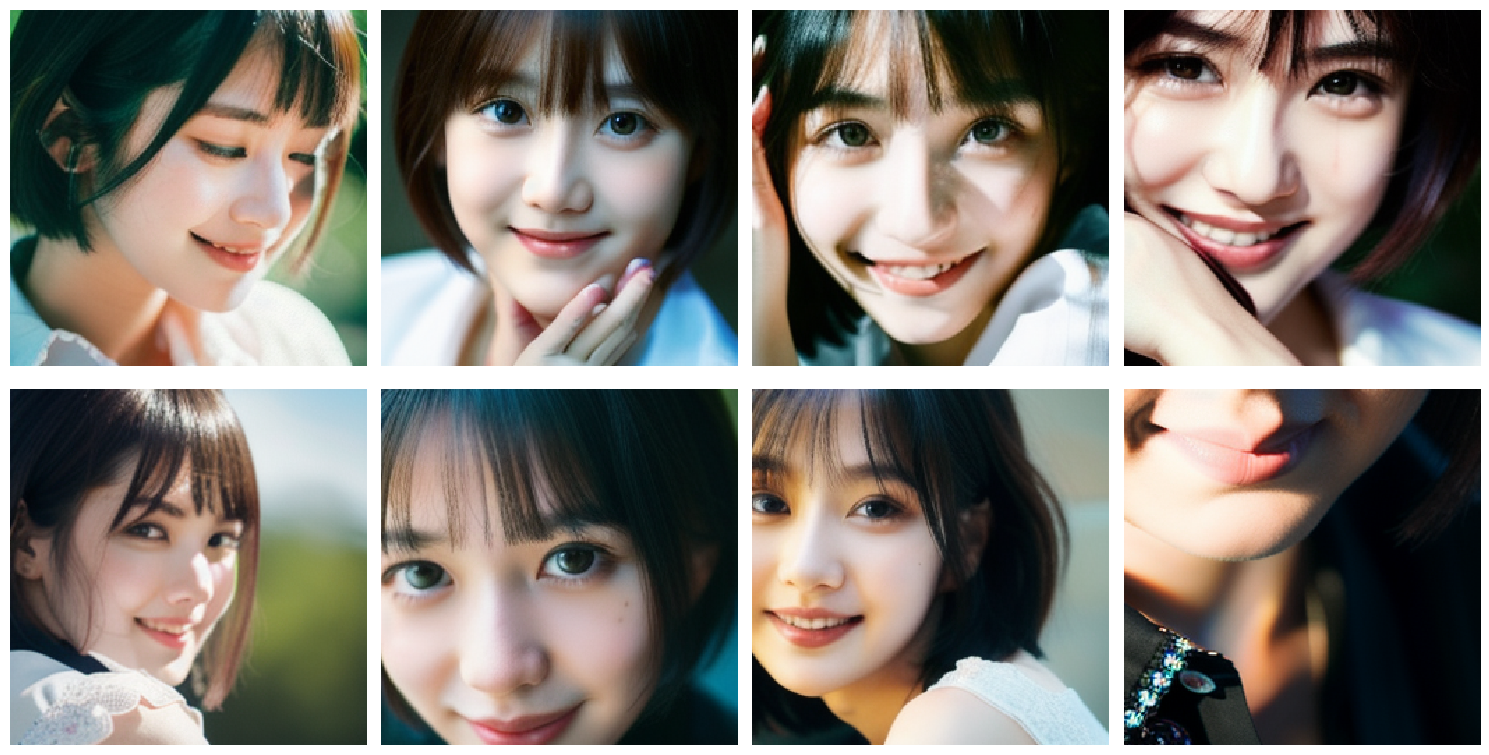

In [9]:
# prompt from https://civitai.com/images/16407281

prompt = "(RAW photo, best quality), (realistic, photo-realistic:1.4), masterpiece, extremely beautiful, extremely detailed, 4k wallpaper, Amazing, finely detail, ultra-detailed, highres, beautiful detailed girl, extremely detailed eyes and face, 1girl, solo, looking at viewer, smile, short hair, bangs, simple background, shirt, black hair, hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo123, lora CHAEWO"
n_prompt = "3d, sepia, painting, cartoons, sketch, watercolor, flat color, (worst quality:2), (low quality:2), (normal quality:2),out of focus,ugly,error, bad anatomy, ((monochrome)), (grayscale), deformed eyes, bad face,(worst quality:2), (low quality:2), (normal quality:2), (bad hands :1.8) ng_deepnegative_v1_75t"

images = pipe(prompt=prompt,
             negative_prompt=n_prompt,
             height=256,
             width=256,
             num_inference_steps=20,
             guidance_scale=8,
             num_images_per_prompt=8
        ).images

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

### num_inference_steps의 영향

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo 1 2 3, lora chaewo']


  0%|          | 0/50 [00:00<?, ?it/s]

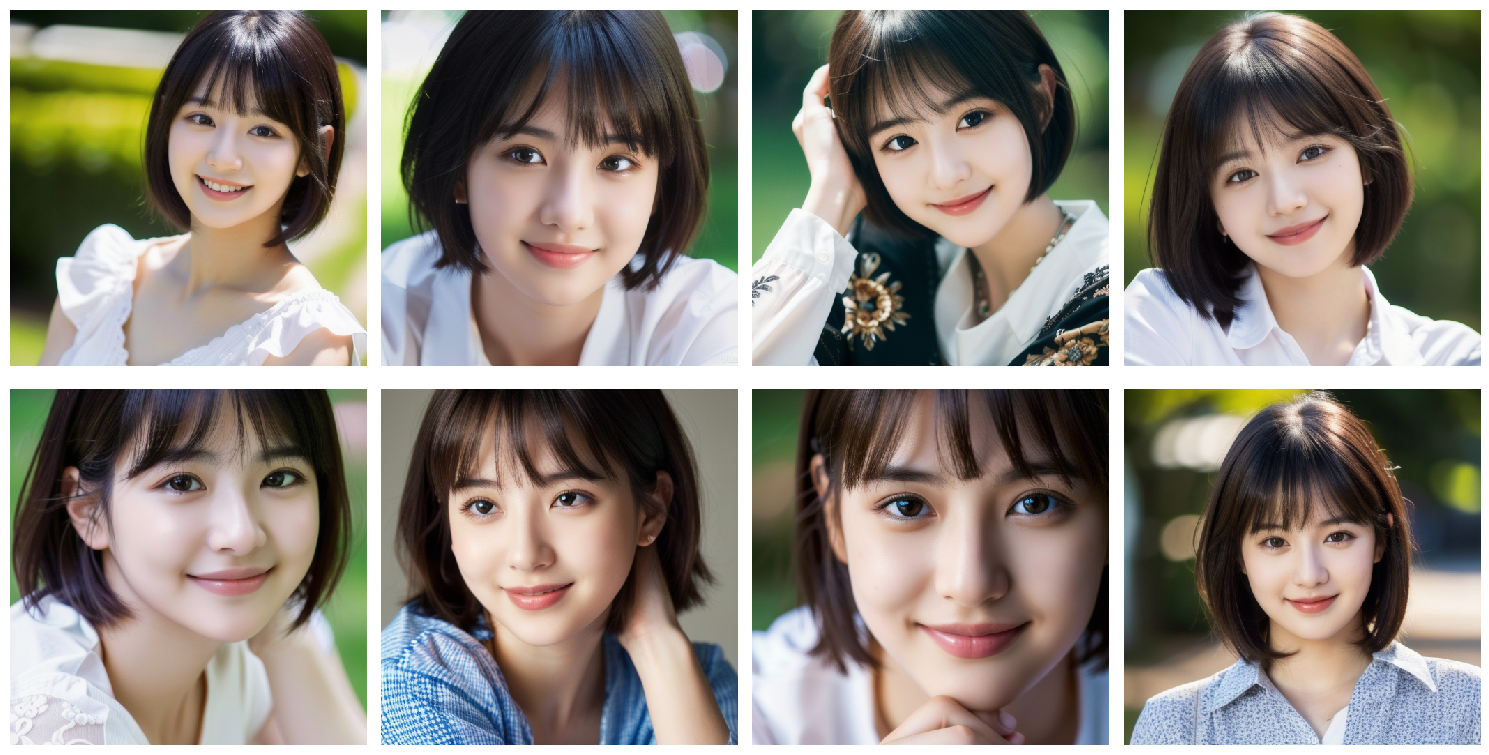

In [11]:
# prompt from https://civitai.com/images/16407281

prompt = "(RAW photo, best quality), (realistic, photo-realistic:1.4), masterpiece, extremely beautiful, extremely detailed, 4k wallpaper, Amazing, finely detail, ultra-detailed, highres, beautiful detailed girl, extremely detailed eyes and face, 1girl, solo, looking at viewer, smile, short hair, bangs, simple background, shirt, black hair, hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo123, lora CHAEWO"
n_prompt = "3d, sepia, painting, cartoons, sketch, watercolor, flat color, (worst quality:2), (low quality:2), (normal quality:2),out of focus,ugly,error, bad anatomy, ((monochrome)), (grayscale), deformed eyes, bad face,(worst quality:2), (low quality:2), (normal quality:2), (bad hands :1.8) ng_deepnegative_v1_75t"

images = pipe(prompt=prompt,
             negative_prompt=n_prompt,
             height=512,
             width=512,
             num_inference_steps=50,
             guidance_scale=7,
             num_images_per_prompt=8
        ).images

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

### guidance_scale의 영향

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo 1 2 3, lora chaewo']


  0%|          | 0/20 [00:00<?, ?it/s]

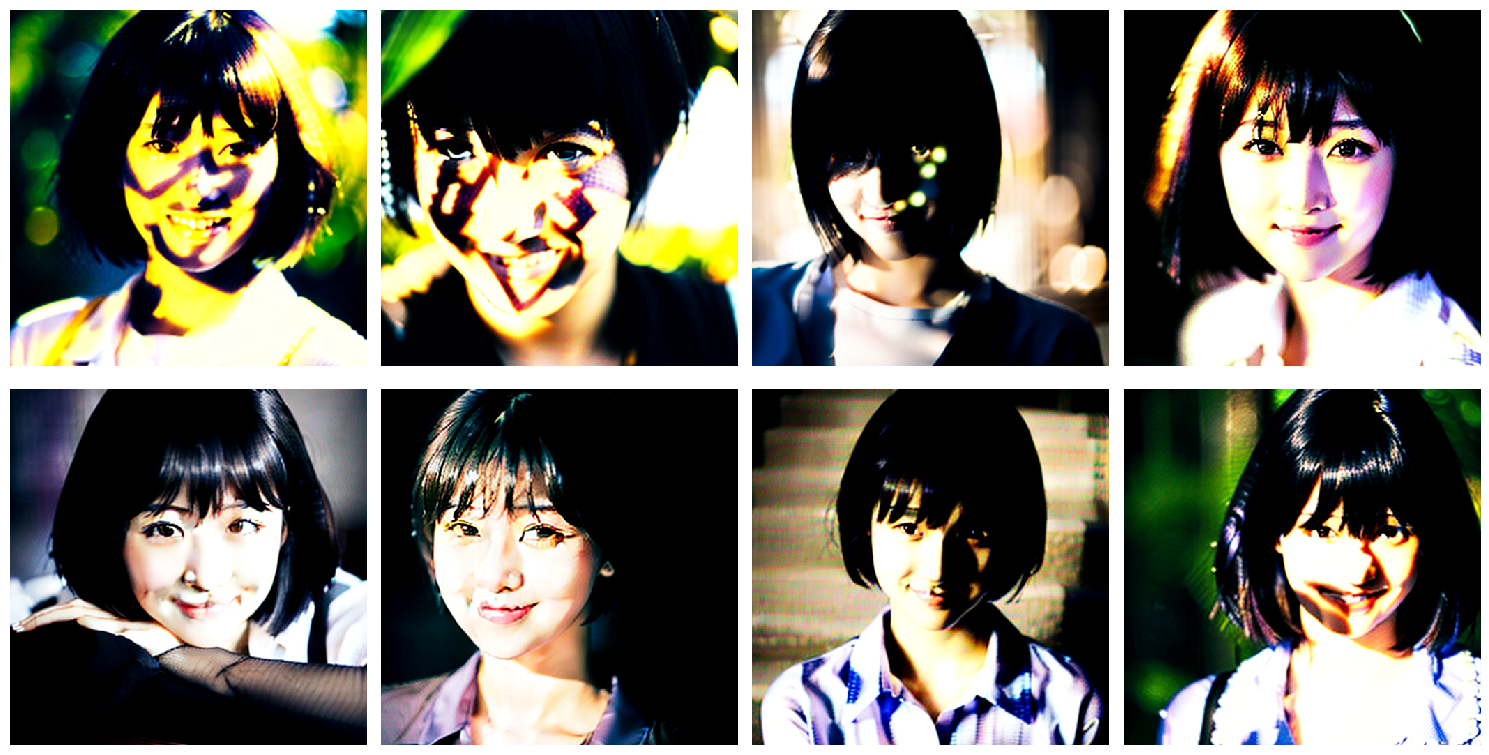

In [12]:
# prompt from https://civitai.com/images/16407281

prompt = "(RAW photo, best quality), (realistic, photo-realistic:1.4), masterpiece, extremely beautiful, extremely detailed, 4k wallpaper, Amazing, finely detail, ultra-detailed, highres, beautiful detailed girl, extremely detailed eyes and face, 1girl, solo, looking at viewer, smile, short hair, bangs, simple background, shirt, black hair, hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo123, lora CHAEWO"
n_prompt = "3d, sepia, painting, cartoons, sketch, watercolor, flat color, (worst quality:2), (low quality:2), (normal quality:2),out of focus,ugly,error, bad anatomy, ((monochrome)), (grayscale), deformed eyes, bad face,(worst quality:2), (low quality:2), (normal quality:2), (bad hands :1.8) ng_deepnegative_v1_75t"

images = pipe(prompt=prompt,
             negative_prompt=n_prompt,
             height=512,
             width=512,
             num_inference_steps=20,
             guidance_scale=50,
             num_images_per_prompt=8
        ).images

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()